In [27]:
import csv
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from sl_ai.utils import clean_listdir

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [28]:
# dataset = Path('gestures_dataset_new.csv')
# DATASET_CSV = Path('../gestures_dataset.csv')
DATASET_ROOT = Path('../ai_data/vgt-all')

# UPLOADED_DATASET_CSV = Path('../uploaded_gestures_dataset.csv')
UPLOADED_GESTURES_ROOT = Path('../ai_data/vgt-uploaded')

In [29]:
def handedness_data_from_directory_names(dataset_location: Path):
    handedness_data = {}
    for gesture_folder in clean_listdir(dataset_location):
        *gestures_name_parts, handedness_string = gesture_folder.split("_")
        gesture_name = "_".join(gestures_name_parts)
        handedness_data[gesture_name] = (
            handedness_string[0] == "1",
            handedness_string[1] == "1",
        )
    return handedness_data

In [30]:
%load_ext autoreload
%autoreload 2
from sl_ai.dataset import GestureDataset

gesture_dataset: GestureDataset = GestureDataset()
gesture_dataset.scan_videos(dataset_location=DATASET_ROOT, handedness_data=handedness_data_from_directory_names(DATASET_ROOT))
# gesture_dataset.analyze_videos(csv_out_path=DATASET_CSV, overwrite=True)
gesture_dataset.load_gestures_from_csv()


for user_folder in clean_listdir(UPLOADED_GESTURES_ROOT):
    for gesture_folder in clean_listdir(UPLOADED_GESTURES_ROOT / user_folder):
        csv_files = list(
            filter(
                lambda file: file.endswith(".csv"),
                clean_listdir(
                    UPLOADED_GESTURES_ROOT / user_folder / gesture_folder
                ),
            )
        )
        if not csv_files:
            print(
                "Warning: Found a uploaded gesture folder without a dataset.csv file."
            )
            continue
        dataset_file = csv_files[0]
        print(
            f"Loading dataset from {UPLOADED_GESTURES_ROOT / user_folder / gesture_folder / dataset_file}"
        )
        *gestures_words, handedness_string = gesture_folder.split("_")
        gesture_name = "_".join(gestures_words)
        uploaded_gesture_dataset = GestureDataset(single_gesture=True)
        uploaded_gesture_dataset.scan_videos(
            dataset_location=UPLOADED_GESTURES_ROOT
            / user_folder
            / gesture_folder,
            handedness_data={
                gesture_name: (
                    handedness_string[0] == "1",
                    handedness_string[1] == "1",
                )
            },
        )
        uploaded_gesture_dataset.load_from_csv(
            csv_path=UPLOADED_GESTURES_ROOT
            / user_folder
            / gesture_folder
            / dataset_file
        )
        gesture_dataset.append_dataset(uploaded_gesture_dataset)

gesture_dataset.summary()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
België -> 0
Bij -> 0
Bowlen -> 0
Computer -> 0
Eekhoorn -> 0
Egel -> 0
Fietsen -> 0
Gebaar -> 0
Geit -> 0
Giraf -> 0
Hallo -> 0
Kameel -> 0
Muis -> 0
Salamander -> 0
Spin -> 0
Tennis -> 0
Verenigde Staten -> 0
Vlieg -> 0
New lookup dict:
{0: 'België',
 1: 'Bij',
 2: 'Bowlen',
 3: 'Computer',
 4: 'Eekhoorn',
 5: 'Egel',
 6: 'Fietsen',
 7: 'Gebaar',
 8: 'Geit',
 9: 'Giraf',
 10: 'Hallo',
 11: 'Kameel',
 12: 'Muis',
 13: 'Salamander',
 14: 'Spin',
 15: 'Tennis',
 16: 'Verenigde Staten',
 17: 'Vlieg'}
Dataset contain 18 gestures.


In [31]:
%load_ext autoreload
%autoreload 2
from sl_ai.gesture_classifier import GestureClassifier
classifier: GestureClassifier = GestureClassifier(gesture_dataset=gesture_dataset)
classifier.train(train_size=.5)
# classifier.summary()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Dataset contain 18 gestures.
Training on shape: (2, 400)
Dateset shape: (148, 2, 400)
Epoch 1/1000
148/148 [==============================] - 1s 2ms/step - loss: 2.7343 - sparse_categorical_accuracy: 0.1351 - val_loss: 1.9964 - val_sparse_categorical_accuracy: 0.3108
Epoch 2/1000
148/148 [==============================] - 0s 1ms/step - loss: 1.8882 - sparse_categorical_accuracy: 0.3378 - val_loss: 1.7668 - val_sparse_categorical_accuracy: 0.3108
Epoch 3/1000
148/148 [==============================] - 0s 1ms/step - loss: 1.7626 - sparse_categorical_accuracy: 0.3851 - val_loss: 1.5128 - val_sparse_categorical_accuracy: 0.5676
Epoch 4/1000
148/148 [==============================] - 0s 2ms/step - loss: 1.4444 - sparse_categorical_accuracy: 0.4932 - val_loss: 1.4291 - val_sparse_categorical_accuracy: 0.4459
Epoch 5/1000
148/148 [==============================] - 0s 1ms/step - loss: 1.3116 - sparse_catego

In [32]:
# classifier.summary()

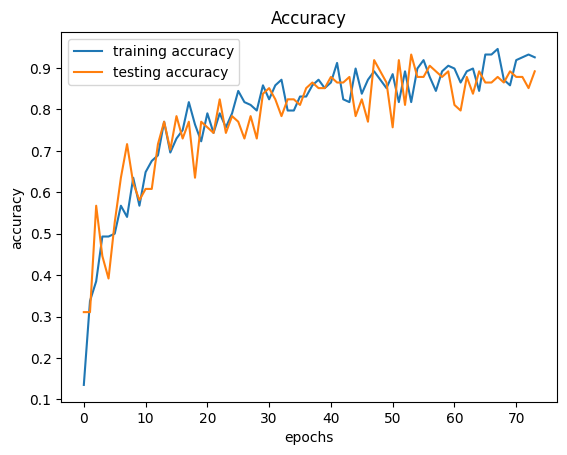

In [33]:
classifier.visualize_accuracy()

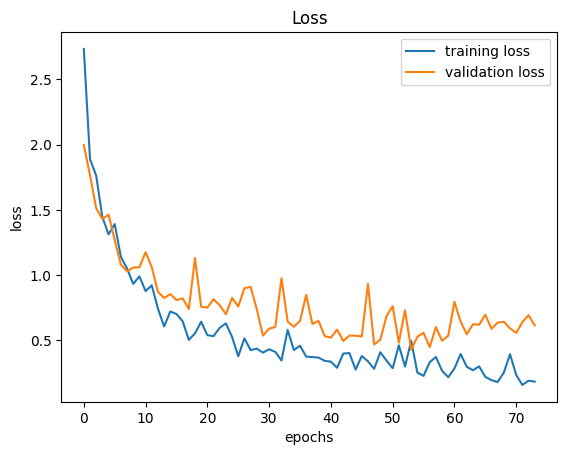

In [34]:
classifier.visualize_loss()

3/3 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.67      0.33      0.44         6
           1       0.50      1.00      0.67         4
           2       1.00      1.00      1.00         6
           3       1.00      0.60      0.75         5
           4       1.00      0.50      0.67         4
           5       1.00      1.00      1.00         1
           6       1.00      0.80      0.89         5
           7       0.75      1.00      0.86         6
           8       0.80      0.80      0.80         5
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         4
          12       0.60      0.75      0.67         4
          13       0.67      1.00      0.80         2
          14       1.00      1.00      1.00         2
          15       1.00      0.80      0.89         5
          16       0.71      0

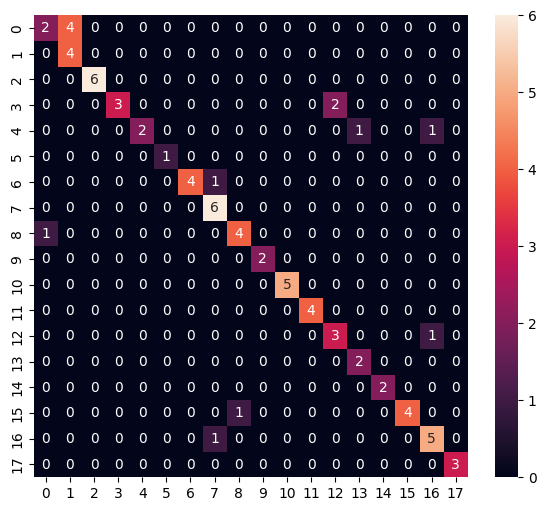

In [35]:
classifier.confusion_matrix()

In [36]:
classifier.save_model("../model.h5")

------------

# Test predictions

In [37]:
# from sl_ai.dataset import detect_hands_task, GestureData
#
# video_path = Path('../ai_data/vgt-all/duidelijk_11/duidelijk - 2023-01-04_16-41-21.mp4')
# gesture_data = GestureData(name="hello", left_hand=False, right_hand=True)
# video_name, (frame_width, frame_height), left_landmarks, right_landmarks = detect_hands_task(gesture_data, video_path)


In [38]:
# from sl_ai.dataset import preprocess_landmarks
# from copy import deepcopy
# left_landmarks_copy = deepcopy(left_landmarks)
# right_landmarks_copy = deepcopy(right_landmarks)
# preprocess_landmarks(left_landmarks_copy, right_landmarks_copy, None, None)

In [39]:
# from sl_ai.dataset import pre_process_point_history_center
#
# for i, landmarks in left_landmarks_copy.items():
#     left_landmarks_copy[i] = pre_process_point_history_center(None, None, landmarks)
# for i, landmarks in right_landmarks_copy.items():
#     right_landmarks_copy[i] = pre_process_point_history_center(None, None, landmarks)

In [40]:
# result = classifier.predict(left_landmarks_copy, right_landmarks_copy)
# classes_x = np.argmax(result, axis=1)
# print(classes_x)
# prediction_percents = (result*100)
# frame = pd.DataFrame(prediction_percents.astype(np.int32))
# print(frame)

In [41]:
# result

In [42]:
# l = np.array(left_landmarks_copy[12], dtype='float32')
# r = np.array(right_landmarks_copy[12], dtype='float32')
#
# x_data = np.concatenate((l, r), axis=0)
# x_data = x_data.reshape((-1, x_data.shape[0]))
# results = classifier.model.predict(x_data, batch_size=1)
# classes_x = np.argmax(result, axis=1)
# print(classes_x)
# prediction_percents = (result*100)
# frame = pd.DataFrame(prediction_percents.astype(np.int32))
# print(frame)

In [43]:
# classifier.train(train_size=.5)
# classifier.summary()

In [44]:
# classifier.visualize_accuracy()

In [45]:
# classifier.visualize_loss()

In [46]:
# classifier.confusion_matrix()

# Test predictions

In [47]:
# from sl_ai.dataset import detect_hands_task, GestureData
#
# video_path = Path('../ai_data/vgt-all/duidelijk_11/duidelijk - 2023-01-04_16-41-21.mp4')
# gesture_data = GestureData(name="hello", left_hand=False, right_hand=True)
# video_name, (frame_width, frame_height), left_landmarks, right_landmarks = detect_hands_task(gesture_data, video_path)


In [48]:
# from sl_ai.dataset import preprocess_landmarks
# from copy import deepcopy
# left_landmarks_copy = deepcopy(left_landmarks)
# right_landmarks_copy = deepcopy(right_landmarks)
# preprocess_landmarks(left_landmarks_copy, right_landmarks_copy, None, None)

In [49]:
# from sl_ai.dataset import pre_process_point_history_center
#
# for i, landmarks in left_landmarks_copy.items():
#     left_landmarks_copy[i] = pre_process_point_history_center(None, None, landmarks)
# for i, landmarks in right_landmarks_copy.items():
#     right_landmarks_copy[i] = pre_process_point_history_center(None, None, landmarks)

In [50]:
# result = classifier.predict(left_landmarks_copy, right_landmarks_copy)
# classes_x = np.argmax(result, axis=1)
# print(classes_x)
# prediction_percents = (result*100)
# frame = pd.DataFrame(prediction_percents.astype(np.int32))
# print(frame)

In [51]:
# result

In [52]:
# l = np.array(left_landmarks_copy[12], dtype='float32')
# r = np.array(right_landmarks_copy[12], dtype='float32')
#
# x_data = np.concatenate((l, r), axis=0)
# x_data = x_data.reshape((-1, x_data.shape[0]))
# results = classifier.model.predict(x_data, batch_size=1)
# classes_x = np.argmax(result, axis=1)
# print(classes_x)
# prediction_percents = (result*100)
# frame = pd.DataFrame(prediction_percents.astype(np.int32))
# print(frame)